In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler

In [3]:
forest = pd.read_csv("forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest.shape

(517, 31)

In [6]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


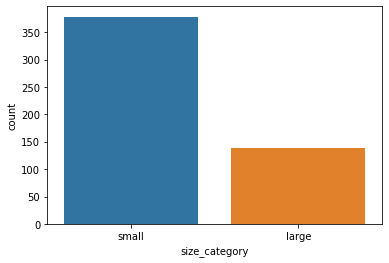

In [7]:
#Visualization of Data parameters
sns.countplot(forest['size_category'])
plt.show()

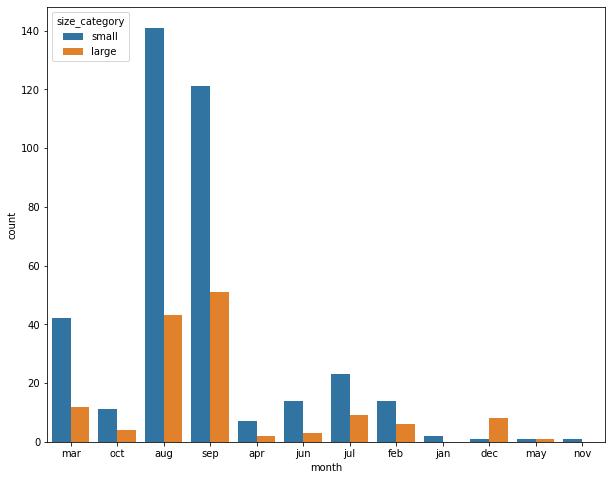

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x = forest['month'],hue=forest['size_category'])
plt.show()

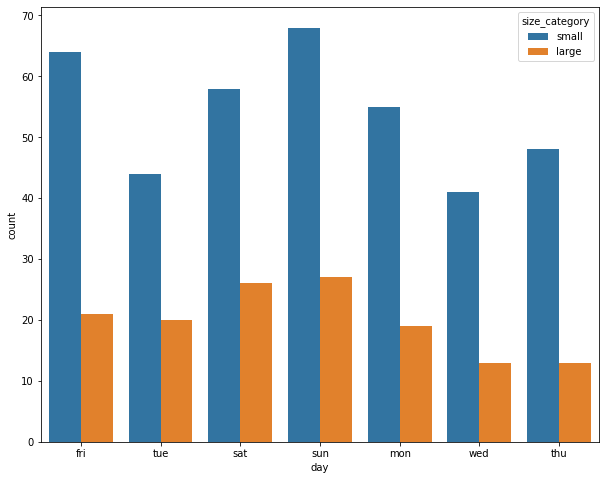

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x = forest['day'],hue=forest['size_category'])
plt.show()

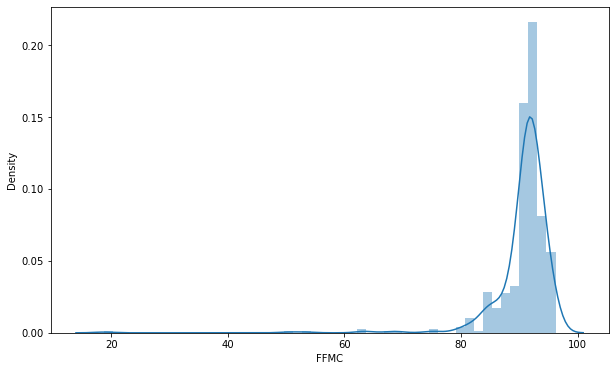

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(forest['FFMC'],)
plt.show()

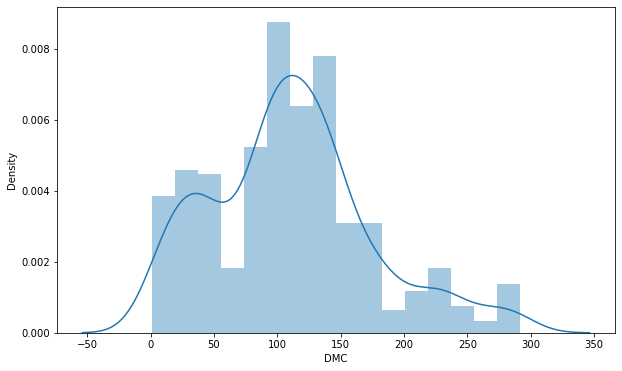

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(forest['DMC'],)
plt.show()


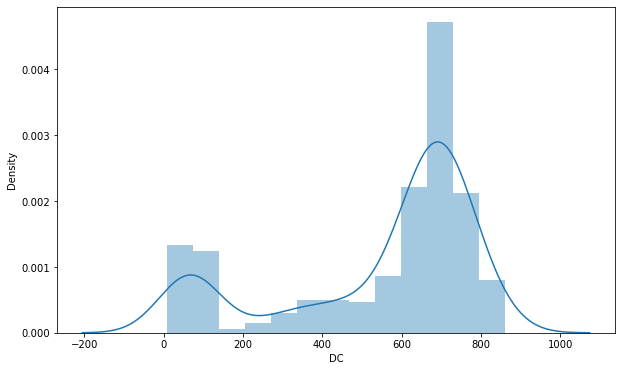

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(forest['DC'],)
plt.show()


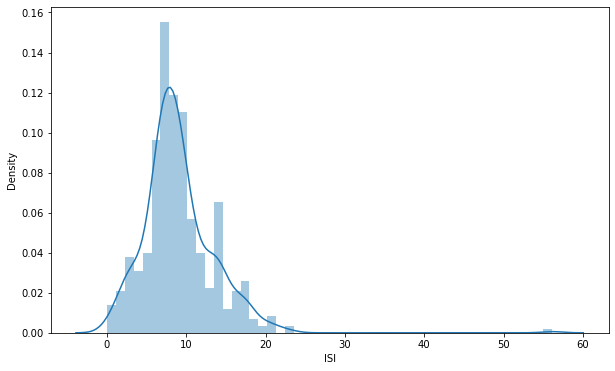

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(forest['ISI'],)
plt.show()


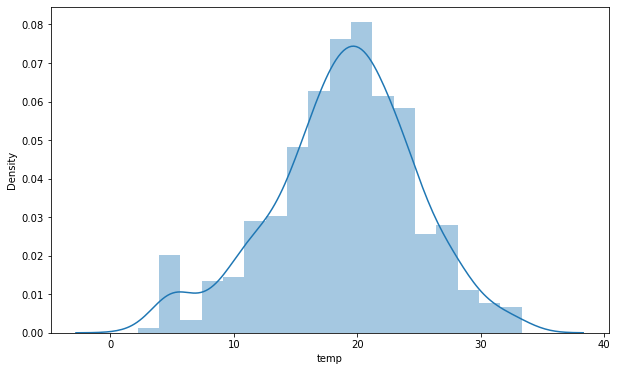

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(forest['temp'],)
plt.show()

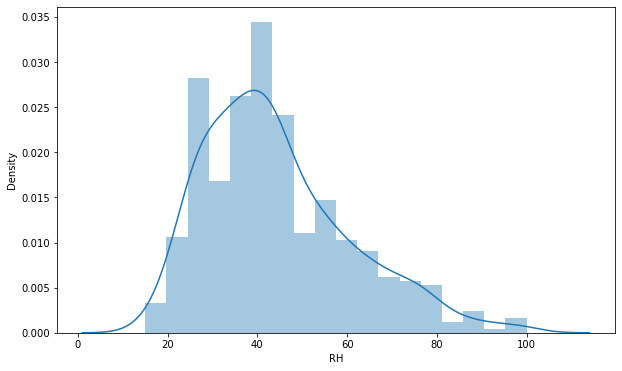

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(forest['RH'],)
plt.show()

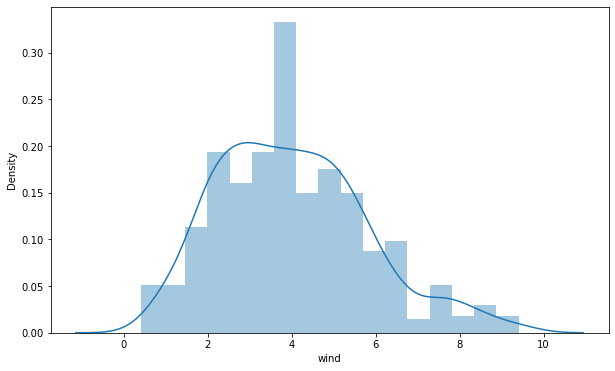

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(forest['wind'],)
plt.show()

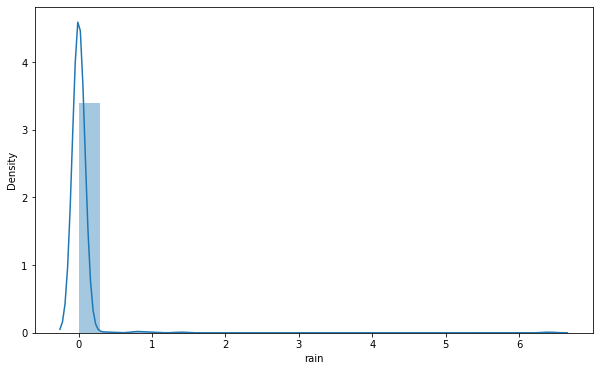

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(forest['rain'],)
plt.show()

In [18]:
forest_fires = forest.drop(labels=['month','day'],axis = 1)
forest_fires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [19]:
le = LabelEncoder()
forest_fires['size_category'] = le.fit_transform(forest_fires['size_category'])
forest_fires.head()
                                                 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


<AxesSubplot:xlabel='size_category', ylabel='count'>

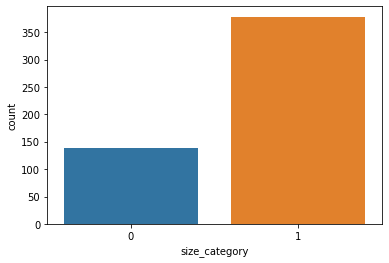

In [20]:
sns.countplot(forest_fires['size_category'])

In [21]:
corr=forest_fires.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


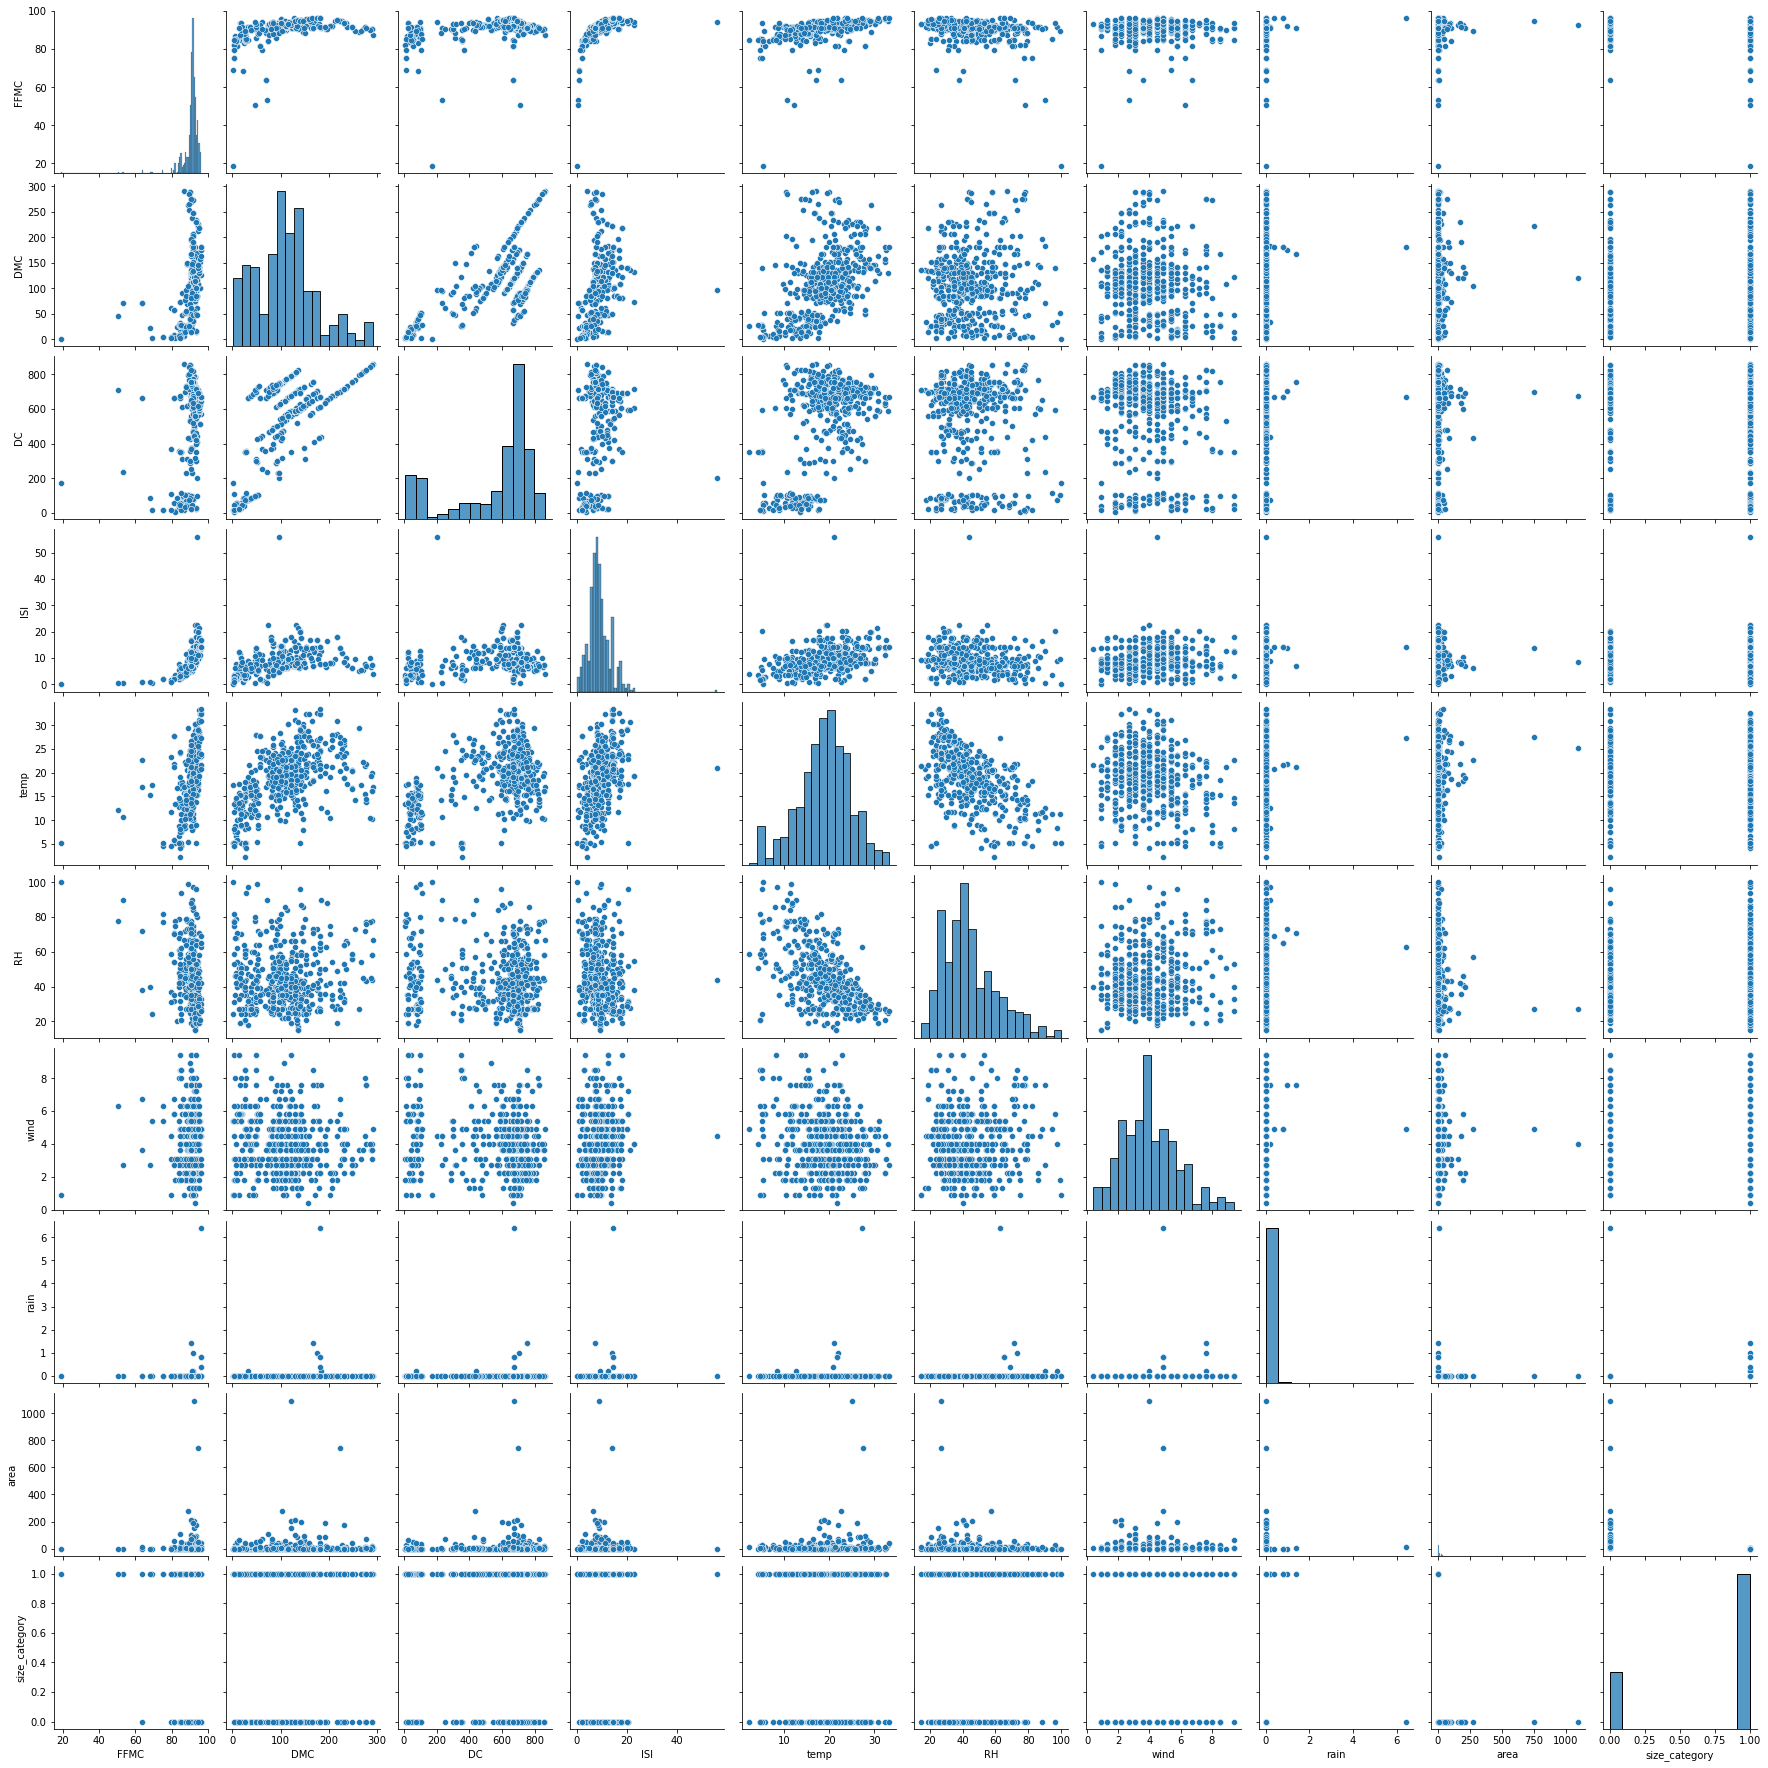

In [22]:
pair_data = pd.concat([forest_fires.iloc[:,0:9],forest_fires.iloc[:,-1]],axis = 1)
sns.pairplot(pair_data)
plt.show()

In [23]:
x = pair_data.drop(labels='size_category',axis = 1).values
y = pair_data[['size_category']].values

In [24]:
scalar = MinMaxScaler()
x_scaled = scalar.fit_transform(x)

In [25]:
x_train, x_test, y_train, y_test  = train_test_split(x_scaled,y,test_size=0.30,random_state=12)

In [26]:
x_test.shape

(156, 9)

In [27]:
sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
# x_train_sm,y_train_sm


In [28]:
x_train_sm.shape

(538, 9)

In [29]:
# create model
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15, input_dim=9, activation='sigmoid'))
model.add(tf.keras.layers.Dense(9,  activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile model
model.compile(loss = keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

<IPython.core.display.Javascript object>

In [32]:
# Fit the model
history=model.fit(x_train_sm, y_train_sm, validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
5/5 [==============================] - 4s 554ms/step - loss: 1.1557 - accuracy: 0.3887 - val_loss: 0.1956 - val_accuracy: 1.0000
Epoch 2/50
5/5 [==============================] - 0s 21ms/step - loss: 1.1573 - accuracy: 0.3659 - val_loss: 0.2096 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 1.0819 - accuracy: 0.3944 - val_loss: 0.2241 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 30ms/step - loss: 1.0693 - accuracy: 0.3815 - val_loss: 0.2392 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 1.0533 - accuracy: 0.3712 - val_loss: 0.2547 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 25ms/step - loss: 0.9921 - accuracy: 0.3970 - val_loss: 0.2707 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 29ms/step - loss: 0.9879 - accuracy: 0.3790 - val_loss: 0.2875 - val_accuracy: 1.0000
Epoch 8/50
5/5 [==========

In [33]:
model.save_weights("mywt.kmw")

In [34]:
# Visualize training history
# list all data in history
model.history.history.keys()
import matplotlib.pyplot as plt

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

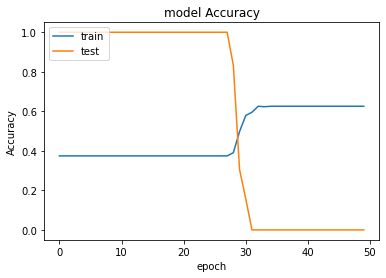

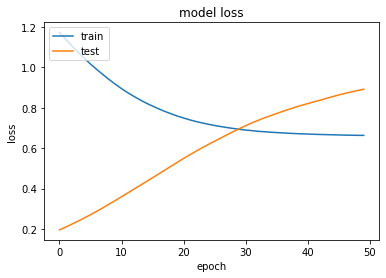

In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
predictions = model.predict(x_test)
predictions

array([[0.5990476 ],
       [0.5991961 ],
       [0.5948822 ],
       [0.5893748 ],
       [0.5953083 ],
       [0.5922947 ],
       [0.59198266],
       [0.5910957 ],
       [0.5785569 ],
       [0.59587663],
       [0.59289414],
       [0.5816253 ],
       [0.5998189 ],
       [0.5973513 ],
       [0.5929379 ],
       [0.5995156 ],
       [0.5925575 ],
       [0.5947233 ],
       [0.59540975],
       [0.5971028 ],
       [0.59108853],
       [0.5963841 ],
       [0.5997549 ],
       [0.59157735],
       [0.5940425 ],
       [0.5986756 ],
       [0.5956317 ],
       [0.59435326],
       [0.58869344],
       [0.5938612 ],
       [0.6019044 ],
       [0.5900348 ],
       [0.5895357 ],
       [0.5797721 ],
       [0.58841807],
       [0.5821157 ],
       [0.59514445],
       [0.60059094],
       [0.5926902 ],
       [0.5928211 ],
       [0.5954476 ],
       [0.5919599 ],
       [0.5930481 ],
       [0.59416157],
       [0.5962331 ],
       [0.59967715],
       [0.596488  ],
       [0.588

In [38]:
y_test

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

# Tuning Hyper Parameters

In [39]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam 


In [40]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])
    return model  


In [41]:

def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=9, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


In [42]:
model_keras_classifier = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20]
epochs = [150, 200]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model_keras_classifier,param_grid = param_grid,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

In [43]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))


Best : 0.9889649868011474, using {'batch_size': 10, 'epochs': 150}
0.9889649868011474,0.010271863817327267 with: {'batch_size': 10, 'epochs': 150}
0.9751141428947449,0.016080823739958245 with: {'batch_size': 10, 'epochs': 200}
0.9640030264854431,0.014120949441037802 with: {'batch_size': 20, 'epochs': 150}
0.9834474802017212,0.016021557695403813 with: {'batch_size': 20, 'epochs': 200}


# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [44]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 9,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10,input_dim = 9,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
    
    

In [45]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.795 total time=   1.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.597 total time=   2.1s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.778 total time=   1.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.806 total time=   1.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [46]:
grid_result.best_params_

{'dropout_rate': 0.0, 'learning_rate': 0.1}